In [ ]:
"""
    File : lineNumberDriversOverTime.ipynb
    Plot : line plot of the average number of drivers harboured in a tumour section with respect to the tumour size
    Input : 
        SourceData_ExtendedData_Fig8c.xlsx, 
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path_to_all_source_data = "../Source data for figures"

In [5]:
def read_and_plot(
    sheet_names,
    driver_advantage_types
):
    def config_font_size(figsize):
        params = {'legend.fontsize': 6,
                  'figure.figsize': figsize,
                 'axes.labelsize': 8,
                 'axes.titlesize': 8,
                 'xtick.labelsize':6,
                 'ytick.labelsize':6,
                 'pdf.fonttype':42}
        plt.rcParams.update(params)
        
    
    for sheet_name, driver_advantage_type in zip(
        excelfile.sheet_names, driver_advantage_types
    ):
        data = pd.read_excel(
            excelfile, 
            sheet_name=sheet_name
        )

        print(sheet_name)
        
        dict_results_per_sim_pdriver6e_4_Surf = {
            simid : data.loc[
                data.SimID == simid
            ]
            for simid in data.loc[
                data.Condition == 'Surface'
            ].SimID.unique()
        }
        dict_results_per_sim_pdriver6e_4_Volu = {
            simid : data.loc[
                data.SimID == simid
            ]
            for simid in data.loc[
                data.Condition == 'Volume'
            ].SimID.unique()
        }
        
        fig = plt.figure(dpi=300)
        ax = fig.add_axes([0.2,0.2,0.75,0.75])

        config_font_size(figsize = (2.75,3))

        pdriver = 6e-4

        ax.set_xlabel('Diameter of tumour slice (mm)')
        ax.set_ylabel('Average number of drivers in tumour voxels')

        ax.set_xlim([0,150])

        # surface 
        for sim in dict_results_per_sim_pdriver6e_4_Surf.keys():
            results_per_sim = dict_results_per_sim_pdriver6e_4_Surf[sim]

            ax.plot(results_per_sim.SliceDiameter, results_per_sim.DriverNumberMean,
                    marker='o', linewidth = 0.2, markersize=0.5, color = "red")

        # volume
        for sim in dict_results_per_sim_pdriver6e_4_Volu.keys():
            results_per_sim = dict_results_per_sim_pdriver6e_4_Volu[sim]

            ax.plot(results_per_sim.SliceDiameter, results_per_sim.DriverNumberMean,
                    marker='o', linewidth = 0.2, markersize=0.5, color = "blue")

        plt.show()

# Extended Data Figure 8c

In [3]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Extended_Data_Figure_8",
    "SourceData_ExtendedData_Fig8c.xlsx"
)

In [4]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataEDFig8ci', 'SourceDataEDFig8cii', 'SourceDataEDFig8ciii']

SourceDataEDFig8ci


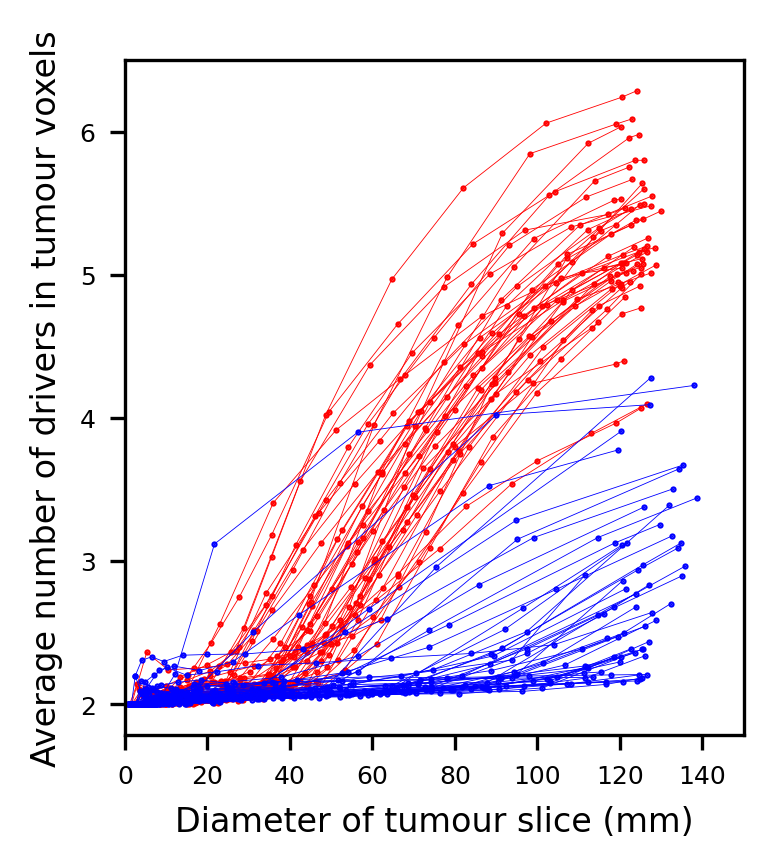

SourceDataEDFig8cii


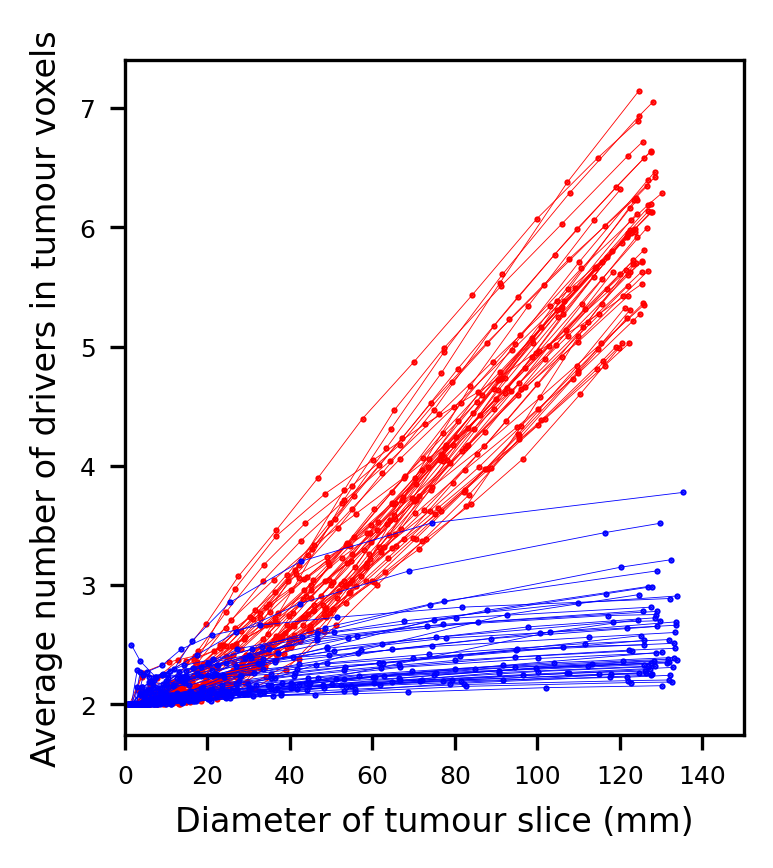

SourceDataEDFig8ciii


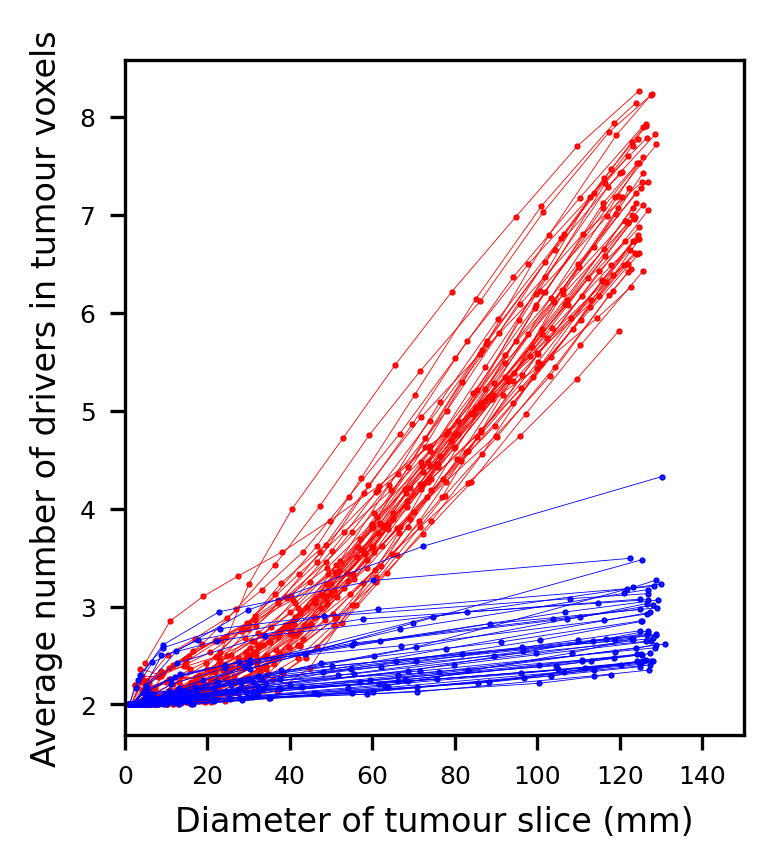

In [7]:
read_and_plot(
    excelfile.sheet_names,
    ['saturated', 'additive', 'additive']
)